<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: s.Yahya Tehrani

**Student ID**: 400109265



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [2]:
## Import necessary libraries here ##
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

In [3]:
boston_df = pd.read_csv('boston.csv')

**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [4]:
# Split the dataset into features (X) and target variable (y)
X = boston_df.drop('MEDV', axis=1)  # Features
y = boston_df['MEDV']  # Target variable

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R^2 scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Get coefficients of the linear regression model
coefficients = model.coef_

# Report the metrics
print("Train R^2 score:", r2_train)
print("Test R^2 score:", r2_test)
print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)
print("Coefficients:", coefficients)

Train R^2 score: 0.7508856358979672
Test R^2 score: 0.6687594935356349
Train RMSE: 4.6520331848801675
Test RMSE: 4.928602182665315
Coefficients: [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10*np.linspace (3,-3,100) *0.5$$

In [5]:
def train_evaluate_ridge(alpha, X_train, y_train, X_test, y_test):
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    
    # Dictionary to store metrics
    metrics = {
        'alpha': alpha,
        'train_r2': r2_score(y_train, ridge_model.predict(X_train)),
        'train_rmse': mean_squared_error(y_train, ridge_model.predict(X_train), squared=False),
        'test_r2': r2_score(y_test, ridge_model.predict(X_test)),
        'test_rmse': mean_squared_error(y_test, ridge_model.predict(X_test), squared=False),
        'ignored_params': np.sum(np.abs(ridge_model.coef_) <= np.max(ridge_model.coef_) / 100),
        'intercept': ridge_model.intercept_,
        'coefficients': {feature: coef for feature, coef in zip(X_train.columns, ridge_model.coef_)}
    }
    
    return ridge_model, metrics

# Generate alphas
alphas = 10 ** np.linspace(3, -3, 100) * 0.5

# Train models and collect their metrics
results = [train_evaluate_ridge(alpha, X_train, y_train, X_test, y_test) for alpha in alphas]

# Separate the models and metrics
models, metrics_list = zip(*results)

# Print the evaluation metrics for each model
for metrics in metrics_list:
    print(f"Alpha: {metrics['alpha']}")
    print(f"Train R^2: {metrics['train_r2']:.2f}")
    print(f"Train RMSE: {metrics['train_rmse']:.2f}")
    print(f"Test R^2: {metrics['test_r2']:.2f}")
    print(f"Test RMSE: {metrics['test_rmse']:.2f}")
    print(f"Intercept: {metrics['intercept']:.2f}")
    print(f"Total parameters: {len(metrics['coefficients'])}")
    print(f"Number of ignored parameters: {metrics['ignored_params']}")
    for feature, coef in metrics['coefficients'].items():
        print(f"{feature}: {coef:.2f}")

Alpha: 500.0
Train R^2: 0.69
Train RMSE: 5.22
Test R^2: 0.67
Test RMSE: 4.89
Intercept: 41.62
Total parameters: 13
Number of ignored parameters: 0
CRIM: -0.11
ZN: 0.04
INDUS: -0.05
CHAS: 0.16
NX: -0.03
RM: 0.92
AGE: 0.02
DIS: -0.76
RAD: 0.31
TAX: -0.01
PTRATIO: -0.75
B: 0.01
LSTAT: -0.78
Alpha: 434.8745013088917
Train R^2: 0.69
Train RMSE: 5.19
Test R^2: 0.68
Test RMSE: 4.88
Intercept: 41.56
Total parameters: 13
Number of ignored parameters: 0
CRIM: -0.11
ZN: 0.04
INDUS: -0.05
CHAS: 0.18
NX: -0.03
RM: 1.01
AGE: 0.02
DIS: -0.80
RAD: 0.31
TAX: -0.01
PTRATIO: -0.77
B: 0.01
LSTAT: -0.78
Alpha: 378.2316637773145
Train R^2: 0.69
Train RMSE: 5.16
Test R^2: 0.68
Test RMSE: 4.86
Intercept: 41.38
Total parameters: 13
Number of ignored parameters: 1
CRIM: -0.11
ZN: 0.04
INDUS: -0.05
CHAS: 0.20
NX: -0.04
RM: 1.12
AGE: 0.02
DIS: -0.84
RAD: 0.31
TAX: -0.02
PTRATIO: -0.78
B: 0.01
LSTAT: -0.77
Alpha: 328.9666123287841
Train R^2: 0.70
Train RMSE: 5.13
Test R^2: 0.68
Test RMSE: 4.86
Intercept: 41.09
Tot

 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

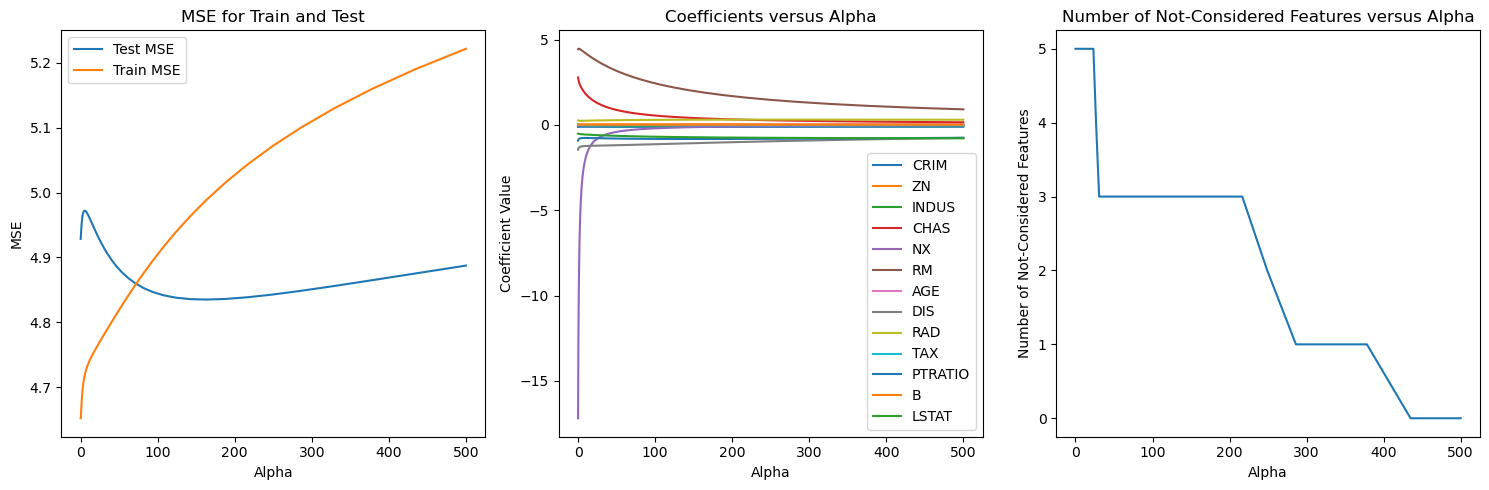

In [34]:
# Plotting
plt.figure(figsize=(15, 5))

# Plot 1: MSE for train and test versus α
plt.subplot(1, 3, 1)
plt.plot(alphas, MSE, label='Test MSE')
plt.plot(alphas, train_rmse_values, label='Train MSE')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE for Train and Test')
plt.legend()

# Plot 2: Coefficients versus α
plt.subplot(1, 3, 2)
for i in range(len(X.columns)):
    coef_values = [model.coef_[i] for model in models]
    plt.plot(alphas, coef_values, label=X.columns[i])
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Coefficients versus Alpha')
plt.legend()

# Plot 3: Number of not-considered features versus α
plt.subplot(1, 3, 3)
plt.plot(alphas, ignored)
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.title('Number of Not-Considered Features versus Alpha')

plt.tight_layout()
plt.show()

In [35]:
# Select the optimal value of α
optimal_alpha_idx = np.argmin(MSE)
optimal_alpha = alphas[optimal_alpha_idx]

# Report metrics for the optimal alpha
optimal_model = models[optimal_alpha_idx]
optimal_y_train_pred = optimal_model.predict(X_train)
optimal_y_test_pred = optimal_model.predict(X_test)

optimal_train_r2 = r2_score(y_train, optimal_y_train_pred)
optimal_train_rmse = mean_squared_error(y_train, optimal_y_train_pred, squared=False)

optimal_test_r2 = r2_score(y_test, optimal_y_test_pred)
optimal_test_rmse = mean_squared_error(y_test, optimal_y_test_pred, squared=False)

print("Optimal Alpha:", optimal_alpha)
print("Train R^2 (Ridge):", optimal_train_r2)
print("Train RMSE (Ridge):", optimal_train_rmse)
print("Test R^2 (Ridge):", optimal_test_r2)
print("Test RMSE (Ridge):", optimal_test_rmse)
print("Model Coefficients (Ridge):")
for feature, coef in zip(X.columns, optimal_model.coef_):
    print(f"{feature}: {coef:.2f}")
print("Intercept (Ridge):", optimal_model.intercept_)

Optimal Alpha: 163.72745814388642
Train R^2 (Ridge): 0.7134515354789044
Train RMSE (Ridge): 4.989332668409178
Test R^2 (Ridge): 0.6812087531281754
Test RMSE (Ridge): 4.8350975348494645
Model Coefficients (Ridge):
CRIM: -0.11
ZN: 0.04
INDUS: -0.05
CHAS: 0.38
NX: -0.12
RM: 1.90
AGE: 0.01
DIS: -1.05
RAD: 0.31
TAX: -0.01
PTRATIO: -0.82
B: 0.01
LSTAT: -0.73
Intercept (Ridge): 38.005384424022935


**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

In [6]:
def train_evaluate_lasso(alpha, X_train, y_train, X_test, y_test):
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    
    # Dictionary to store metrics
    metrics = {
        'alpha': alpha,
        'train_r2': r2_score(y_train, lasso_model.predict(X_train)),
        'train_rmse': mean_squared_error(y_train, lasso_model.predict(X_train), squared=False),
        'test_r2': r2_score(y_test, lasso_model.predict(X_test)),
        'test_rmse': mean_squared_error(y_test, lasso_model.predict(X_test), squared=False),
        'ignored_params': np.sum(np.abs(lasso_model.coef_) < 1e-4),
        'intercept': lasso_model.intercept_,
        'coefficients': lasso_model.coef_
    }
    
    return lasso_model, metrics

# Generate alphas
alphas = 10 ** np.linspace(3, -3, 100) * 0.5

# Train models and collect their metrics
results = [train_evaluate_lasso(alpha, X_train, y_train, X_test, y_test) for alpha in alphas]

# Separate the models and metrics
models, metrics_list = zip(*results)

# Print the evaluation metrics for each model
for metrics in metrics_list:
    print(f"Alpha: {metrics['alpha']}")
    print(f"Train R2: {metrics['train_r2']:.2f}")
    print(f"Train RMSE: {metrics['train_rmse']:.2f}")
    print(f"Test R2: {metrics['test_r2']:.2f}")
    print(f"Test RMSE: {metrics['test_rmse']:.2f}")
    print(f"Intercept: {metrics['intercept']:.2f}")
    print(f"Total parameters: {len(metrics['coefficients'])}")
    print(f"Number of ignored parameters: {metrics['ignored_params']}")
    
    # Print model coefficients
    for i, coef in enumerate(metrics['coefficients']):
        if coef != 0:  # Assuming we only want to print non-zero coefficients
            print(f"Feature_{i}: {coef:.2f}")

Alpha: 500.0
Train R2: 0.11
Train RMSE: 8.81
Test R2: 0.12
Test RMSE: 8.05
Intercept: 25.90
Total parameters: 13
Number of ignored parameters: 12
Feature_9: -0.01
Alpha: 434.8745013088917
Train R2: 0.13
Train RMSE: 8.68
Test R2: 0.15
Test RMSE: 7.91
Intercept: 26.85
Total parameters: 13
Number of ignored parameters: 12
Feature_9: -0.01
Alpha: 378.2316637773145
Train R2: 0.15
Train RMSE: 8.58
Test R2: 0.17
Test RMSE: 7.79
Intercept: 27.68
Total parameters: 13
Number of ignored parameters: 12
Feature_9: -0.01
Alpha: 328.9666123287841
Train R2: 0.17
Train RMSE: 8.51
Test R2: 0.19
Test RMSE: 7.71
Intercept: 28.40
Total parameters: 13
Number of ignored parameters: 12
Feature_9: -0.01
Alpha: 286.118382967511
Train R2: 0.18
Train RMSE: 8.45
Test R2: 0.20
Test RMSE: 7.64
Intercept: 29.03
Total parameters: 13
Number of ignored parameters: 12
Feature_9: -0.02
Alpha: 248.85117821660543
Train R2: 0.19
Train RMSE: 8.41
Test R2: 0.21
Test RMSE: 7.59
Intercept: 29.58
Total parameters: 13
Number of ig

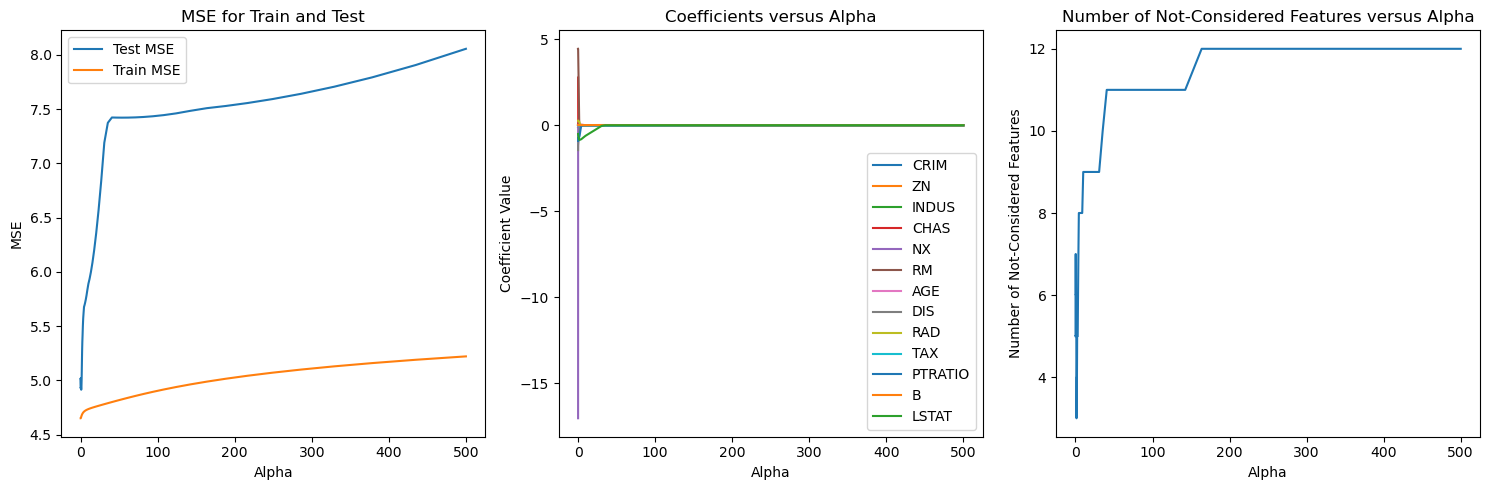

In [40]:
# Plotting
plt.figure(figsize=(15, 5))

# Plot 1: MSE for train and test versus α
plt.subplot(1, 3, 1)
plt.plot(alphas, MSE, label='Test MSE')
plt.plot(alphas, train_rmse_values, label='Train MSE')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE for Train and Test')
plt.legend()

# Plot 2: Coefficients versus α
plt.subplot(1, 3, 2)
for i in range(len(X.columns)):
    coef_values = [model.coef_[i] for model in models]
    plt.plot(alphas, coef_values, label=X.columns[i])
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Coefficients versus Alpha')
plt.legend()

# Plot 3: Number of not-considered features versus α
plt.subplot(1, 3, 3)
plt.plot(alphas, ignored)
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.title('Number of Not-Considered Features versus Alpha')

plt.tight_layout()
plt.show()

In [41]:
# Select the optimal value of α
optimal_alpha_idx = np.argmin(MSE)
optimal_alpha = alphas[optimal_alpha_idx]

# Report metrics for the optimal alpha
optimal_model = models[optimal_alpha_idx]
optimal_y_train_pred = optimal_model.predict(X_train)
optimal_y_test_pred = optimal_model.predict(X_test)

optimal_train_r2 = r2_score(y_train, optimal_y_train_pred)
optimal_train_rmse = mean_squared_error(y_train, optimal_y_train_pred, squared=False)

optimal_test_r2 = r2_score(y_test, optimal_y_test_pred)
optimal_test_rmse = mean_squared_error(y_test, optimal_y_test_pred, squared=False)

print("Optimal Alpha:", optimal_alpha)
print("Train R^2 (Ridge):", optimal_train_r2)
print("Train RMSE (Ridge):", optimal_train_rmse)
print("Test R^2 (Ridge):", optimal_test_r2)
print("Test RMSE (Ridge):", optimal_test_rmse)
print("Model Coefficients (Ridge):")
for feature, coef in zip(X.columns, optimal_model.coef_):
    print(f"{feature}: {coef:.2f}")
print("Intercept (Ridge):", optimal_model.intercept_)

Optimal Alpha: 0.7087370814634024
Train R^2 (Ridge): 0.7158844065288319
Train RMSE (Ridge): 4.968107153319177
Test R^2 (Ridge): 0.6706399397086964
Test RMSE (Ridge): 4.9145924798576495
Model Coefficients (Ridge):
CRIM: -0.09
ZN: 0.03
INDUS: -0.00
CHAS: 0.00
NX: -0.00
RM: 2.51
AGE: 0.01
DIS: -0.80
RAD: 0.23
TAX: -0.01
PTRATIO: -0.72
B: 0.01
LSTAT: -0.69
Intercept (Ridge): 30.09291671450614


Choosing between ridge and Lasso regression depends on the problem at hand. Lasso is great for feature selection, whereas ridge helps shrink coefficients toward zero.

**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

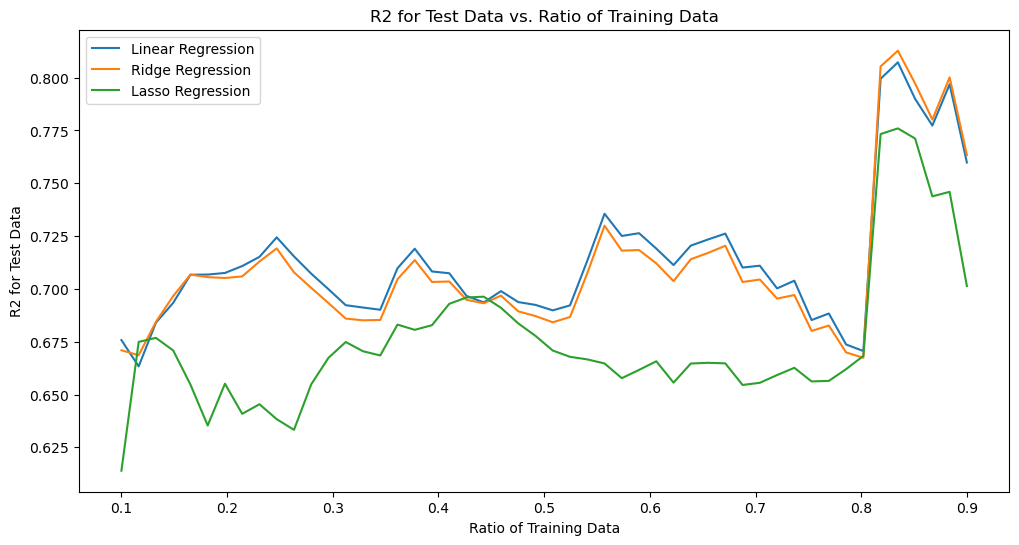

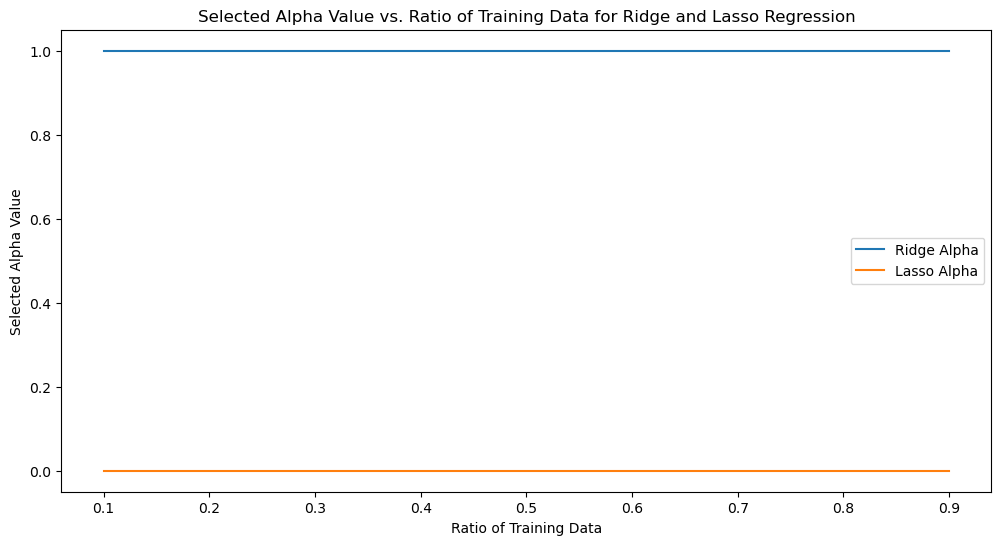

In [47]:
# Vary the ratio of training data
ratios = np.linspace(0.1, 0.9, 50)

linear_r2, ridge_r2, lasso_r2 = [], [], []
ridge_alphas, lasso_alphas = [], []

for ratio in ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-ratio, random_state=42)

    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    linear_r2.append(r2_score(y_test, linear_model.predict(X_test)))

    # Ridge Regression
    ridge_model = Ridge()
    ridge_model.fit(X_train, y_train)
    ridge_r2.append(r2_score(y_test, ridge_model.predict(X_test)))
    ridge_alphas.append(ridge_model.get_params()['alpha'])

    # Lasso Regression
    lasso_model = Lasso()
    lasso_model.fit(X_train, y_train)
    lasso_r2.append(r2_score(y_test, lasso_model.predict(X_test)))
    lasso_alphas.append(lasso.get_params()['alpha'])

# Plot R2 for test data versus ratio of training data
plt.figure(figsize=(12, 6))
plt.plot(ratios, linear_r2, label='Linear Regression')
plt.plot(ratios, ridge_r2, label='Ridge Regression')
plt.plot(ratios, lasso_r2, label='Lasso Regression')
plt.xlabel('Ratio of Training Data')
plt.ylabel('R2 for Test Data')
plt.title('R2 for Test Data vs. Ratio of Training Data')
plt.legend()
plt.show()

# Plot Selected Alpha values for Ridge and Lasso Regression
plt.figure(figsize=(12, 6))
plt.plot(ratios, ridge_alphas, label='Ridge Alpha')
plt.plot(ratios, lasso_alphas, label='Lasso Alpha')
plt.xlabel('Ratio of Training Data')
plt.ylabel('Selected Alpha Value')
plt.title('Selected Alpha Value vs. Ratio of Training Data for Ridge and Lasso Regression')
plt.legend()
plt.show()
